<a href="https://colab.research.google.com/github/sugunayaparala/Hotel-booking-_Analysis/blob/main/Seoul_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# New section

### **## Importing Relevant Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


### **Step 1: Reading and Understanding the Data**

In [ ]:
data_set=pd.read_csv('SeoulBikeData.csv',encoding= 'unicode_escape')
data_set

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


The given train dataset has 8760 rows and 14 columns. Season, holiday, working day columns are categorical. Rest all, except ‘datetime’ are numerical columns.

## **Missing values in our data**

In [ ]:
data_set.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

% Here we observe that our data has not any missing values.

## **Data set information**

In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
data_set['Date']=pd.to_datetime(data_set['Date'])
data_set['Day']=data_set['Date'].dt.day
data_set['Month']=data_set['Date'].dt.month
data_set['Year']=data_set['Date'].dt.year
data_set.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017


In [ ]:
data_set.drop(['Date'],inplace=True,axis=1)


In [ ]:
data_set.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017


In [ ]:
data_set['Visibility (10m)'].value_counts()

2000    2245
1995      34
1985      28
1999      28
1989      28
        ... 
892        1
1656       1
1851       1
627        1
1688       1
Name: Visibility (10m), Length: 1789, dtype: int64

In [ ]:
data_set['Solar Radiation (MJ/m2)'].value_counts()

0.00    4300
0.01     128
0.02      82
0.03      69
0.06      61
        ... 
3.38       1
2.97       1
3.44       1
3.49       1
3.45       1
Name: Solar Radiation (MJ/m2), Length: 345, dtype: int64

In [ ]:
data_set['Snowfall (cm)'].value_counts()

0.0    8317
0.3      42
1.0      39
0.9      34
0.5      34
0.7      31
0.8      22
2.0      22
0.4      21
1.6      19
2.2      18
0.2      15
0.6      15
3.5      14
2.6      12
2.5      10
1.2       8
2.7       6
1.8       5
3.0       5
4.0       4
4.1       4
3.2       4
1.3       4
3.7       3
3.3       3
1.1       3
3.8       3
2.3       3
2.1       3
1.9       3
1.7       3
2.4       3
3.4       2
8.8       2
2.8       2
2.9       2
0.1       2
5.0       2
4.8       2
1.4       2
3.9       2
4.3       2
5.1       1
1.5       1
3.1       1
7.1       1
7.0       1
6.0       1
3.6       1
4.2       1
Name: Snowfall (cm), dtype: int64

In [ ]:
data_set['Rainfall(mm)'].value_counts()

0.0     8232
0.5      116
1.0       66
1.5       56
0.1       46
        ... 
1.9        1
3.3        1
17.0       1
1.4        1
1.8        1
Name: Rainfall(mm), Length: 61, dtype: int64

In [ ]:
data_set['Visibility (10m)']=data_set['Visibility (10m)'].apply(lambda x:1 if x>=2000 else 0)

In [ ]:
data_set['Solar Radiation (MJ/m2)']=data_set['Solar Radiation (MJ/m2)'].apply(lambda x:1 if x>=0.06 else 0)

In [ ]:
data_set['Rainfall(mm)']=data_set['Rainfall(mm)'].apply(lambda x:1 if x>=0.1 else 0)

In [ ]:
data_set['Snowfall (cm)']=data_set['Snowfall (cm)'].apply(lambda x:1 if x>=0.7 else 0)

In [ ]:
data_set

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year
0,254,0,-5.2,37,2.2,1,-17.6,0,0,0,Winter,No Holiday,Yes,12,1,2017
1,204,1,-5.5,38,0.8,1,-17.6,0,0,0,Winter,No Holiday,Yes,12,1,2017
2,173,2,-6.0,39,1.0,1,-17.7,0,0,0,Winter,No Holiday,Yes,12,1,2017
3,107,3,-6.2,40,0.9,1,-17.6,0,0,0,Winter,No Holiday,Yes,12,1,2017
4,78,4,-6.0,36,2.3,1,-18.6,0,0,0,Winter,No Holiday,Yes,12,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,0,-10.3,0,0,0,Autumn,No Holiday,Yes,30,11,2018
8756,764,20,3.4,37,2.3,1,-9.9,0,0,0,Autumn,No Holiday,Yes,30,11,2018
8757,694,21,2.6,39,0.3,0,-9.9,0,0,0,Autumn,No Holiday,Yes,30,11,2018
8758,712,22,2.1,41,1.0,0,-9.8,0,0,0,Autumn,No Holiday,Yes,30,11,2018


In [ ]:
data_set['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [ ]:
data_set['Holiday']=data_set['Holiday'].map({'No Holiday':0,'Holiday':1})


In [ ]:
data_set['Holiday'].value_counts()

0    8328
1     432
Name: Holiday, dtype: int64

In [ ]:
data_set['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [ ]:
data_set['Functioning Day']=data_set['Functioning Day'].map({'No':0,'Yes':1})

In [ ]:
data_set['Functioning Day'].value_counts()

1    8465
0     295
Name: Functioning Day, dtype: int64

In [ ]:
data_set.isnull().sum()

Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
Day                          0
Month                        0
Year                         0
dtype: int64

# Visualising the data

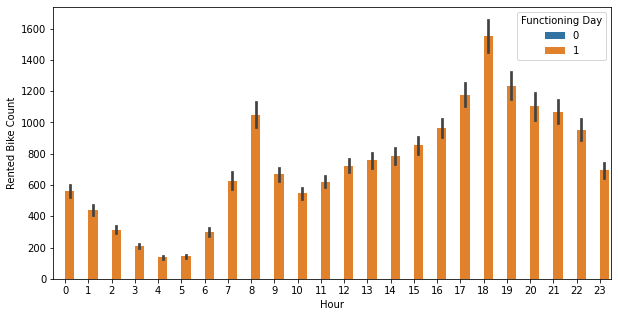

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='Hour',y='Rented Bike Count',hue='Functioning Day',data=data_set)
plt.show()


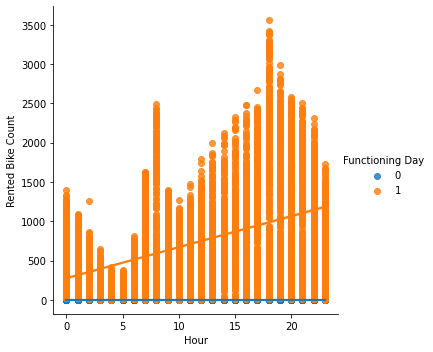

In [ ]:
sns.lmplot(x='Hour',y='Rented Bike Count',hue='Functioning Day',data=data_set)
plt.show()

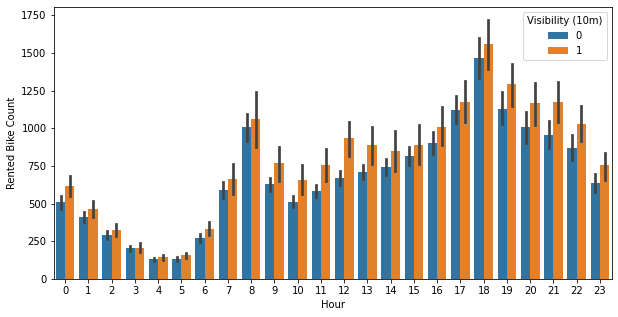

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='Hour',y='Rented Bike Count',hue='Visibility (10m)',data=data_set)
plt.show()

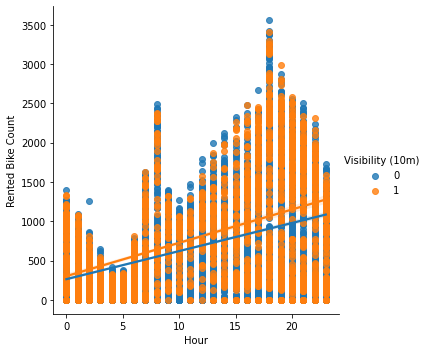

In [ ]:
sns.lmplot(x='Hour',y='Rented Bike Count',hue='Visibility (10m)',data=data_set)
plt.show()

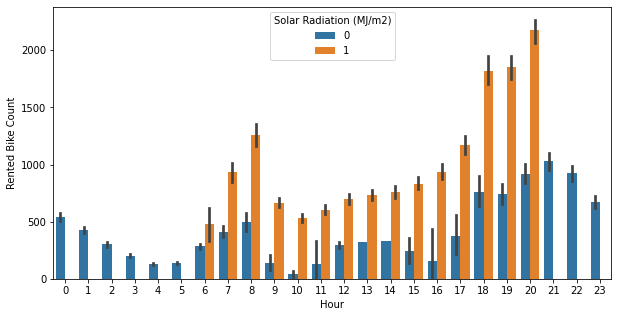

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='Hour',y='Rented Bike Count',hue='Solar Radiation (MJ/m2)',data=data_set)
plt.show()

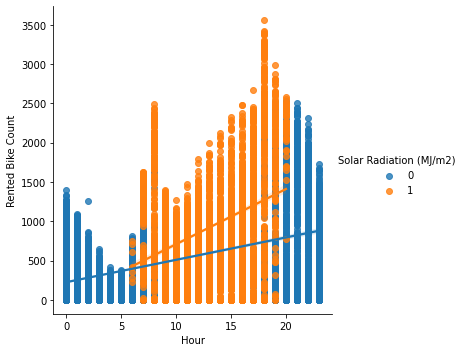

In [ ]:
sns.lmplot(x='Hour',y='Rented Bike Count',hue='Solar Radiation (MJ/m2)',data=data_set)
plt.show()

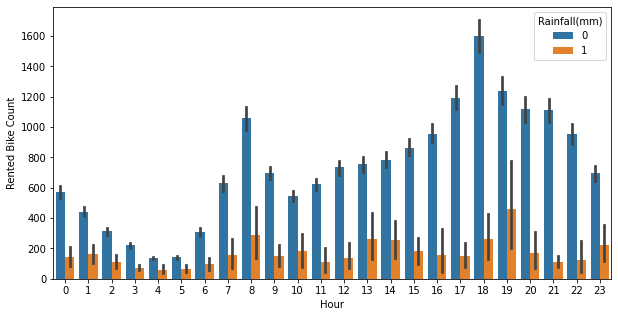

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='Hour',y='Rented Bike Count',hue='Rainfall(mm)',data=data_set)
plt.show()

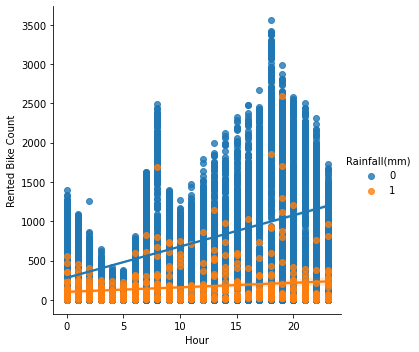

In [ ]:
sns.lmplot(x='Hour',y='Rented Bike Count',hue='Rainfall(mm)',data=data_set)
plt.show()

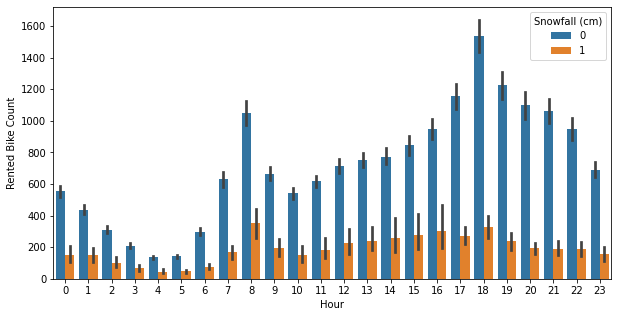

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='Hour',y='Rented Bike Count',hue='Snowfall (cm)',data=data_set)
plt.show()

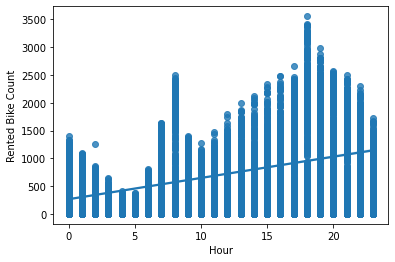

In [ ]:
sns.regplot(x='Hour',y='Rented Bike Count',data=data_set)
plt.show()

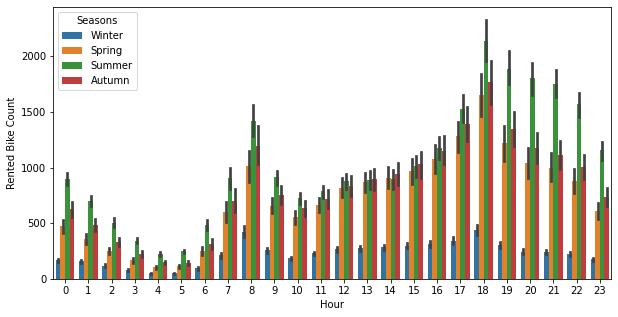

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='Hour',y='Rented Bike Count',hue='Seasons',data=data_set)
plt.show()

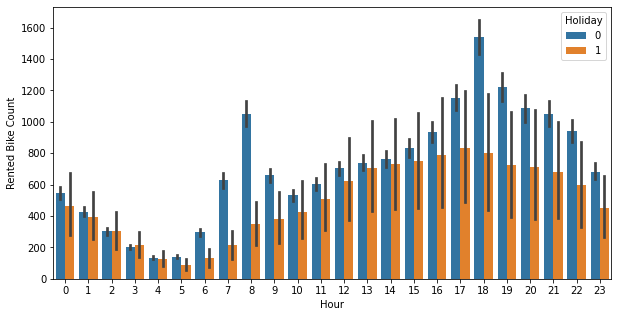

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='Hour',y='Rented Bike Count',hue='Holiday',data=data_set)
plt.show()

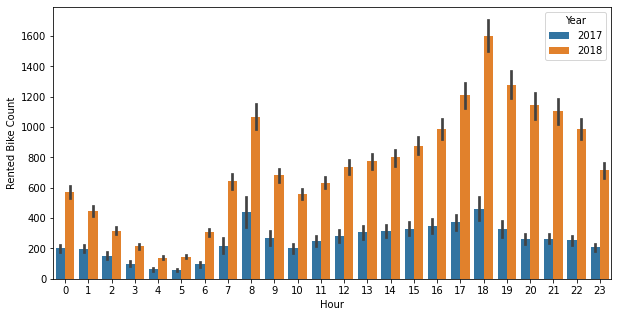

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='Hour',y='Rented Bike Count',hue='Year',data=data_set)
plt.show()

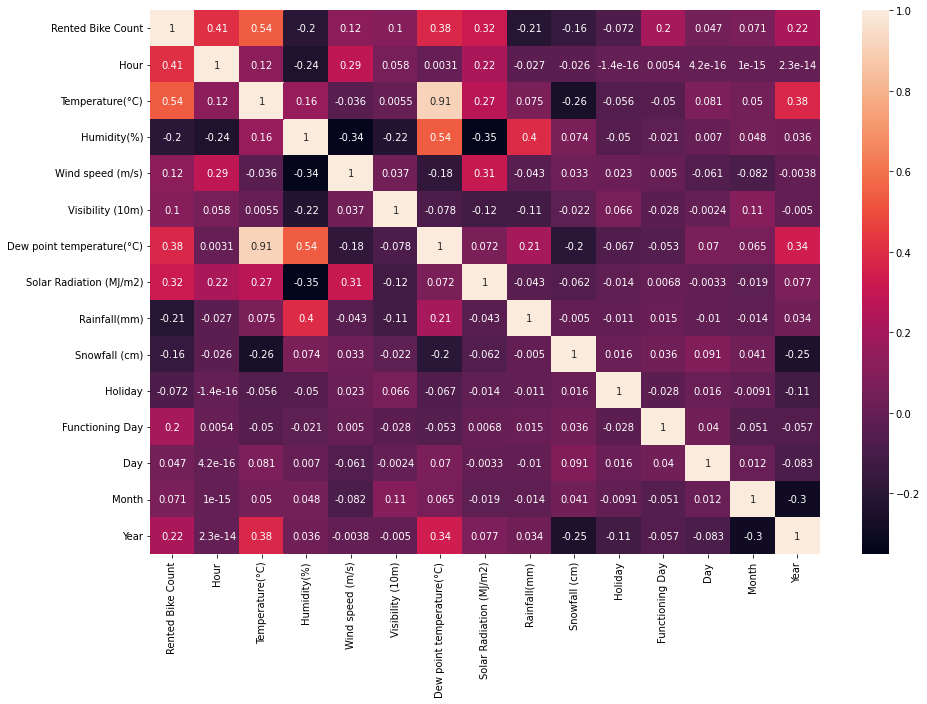

In [ ]:
corr_matrix=data_set.corr()
plt.figure(figsize=(15,10))

sns.heatmap(corr_matrix,annot=True)

In [ ]:
data_set=data_set[data_set['Functioning Day']!=0]
data_set['Functioning Day'].value_counts()

1    8465
Name: Functioning Day, dtype: int64

In [ ]:
Seasons=pd.get_dummies(data_set['Seasons'])
print(Seasons)
data_set=data_set.append(Seasons)


      Autumn  Spring  Summer  Winter
0          0       0       0       1
1          0       0       0       1
2          0       0       0       1
3          0       0       0       1
4          0       0       0       1
...      ...     ...     ...     ...
8755       1       0       0       0
8756       1       0       0       0
8757       1       0       0       0
8758       1       0       0       0
8759       1       0       0       0

[8465 rows x 4 columns]


In [ ]:
data_set.isnull().sum()

Rented Bike Count            8465
Hour                         8465
Temperature(°C)              8465
Humidity(%)                  8465
Wind speed (m/s)             8465
Visibility (10m)             8465
Dew point temperature(°C)    8465
Solar Radiation (MJ/m2)      8465
Rainfall(mm)                 8465
Snowfall (cm)                8465
Seasons                      8465
Holiday                      8465
Functioning Day              8465
Day                          8465
Month                        8465
Year                         8465
Autumn                       8465
Spring                       8465
Summer                       8465
Winter                       8465
dtype: int64

In [ ]:
data_set.fillna(0,inplace=True)
data_set.drop('Seasons',inplace=True,axis=1)
data_set.isnull().sum()


Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Holiday                      0
Functioning Day              0
Day                          0
Month                        0
Year                         0
Autumn                       0
Spring                       0
Summer                       0
Winter                       0
dtype: int64

In [ ]:
data_set

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Day,Month,Year,Autumn,Spring,Summer,Winter
0,254.0,0.0,-5.2,37.0,2.2,1.0,-17.6,0.0,0.0,0.0,0.0,1.0,12.0,1.0,2017.0,0.0,0.0,0.0,0.0
1,204.0,1.0,-5.5,38.0,0.8,1.0,-17.6,0.0,0.0,0.0,0.0,1.0,12.0,1.0,2017.0,0.0,0.0,0.0,0.0
2,173.0,2.0,-6.0,39.0,1.0,1.0,-17.7,0.0,0.0,0.0,0.0,1.0,12.0,1.0,2017.0,0.0,0.0,0.0,0.0
3,107.0,3.0,-6.2,40.0,0.9,1.0,-17.6,0.0,0.0,0.0,0.0,1.0,12.0,1.0,2017.0,0.0,0.0,0.0,0.0
4,78.0,4.0,-6.0,36.0,2.3,1.0,-18.6,0.0,0.0,0.0,0.0,1.0,12.0,1.0,2017.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
data_set

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Day,Month,Year,Autumn,Spring,Summer,Winter
0,254.0,0.0,-5.2,37.0,2.2,1.0,-17.6,0.0,0.0,0.0,0.0,1.0,12.0,1.0,2017.0,0.0,0.0,0.0,0.0
1,204.0,1.0,-5.5,38.0,0.8,1.0,-17.6,0.0,0.0,0.0,0.0,1.0,12.0,1.0,2017.0,0.0,0.0,0.0,0.0
2,173.0,2.0,-6.0,39.0,1.0,1.0,-17.7,0.0,0.0,0.0,0.0,1.0,12.0,1.0,2017.0,0.0,0.0,0.0,0.0
3,107.0,3.0,-6.2,40.0,0.9,1.0,-17.6,0.0,0.0,0.0,0.0,1.0,12.0,1.0,2017.0,0.0,0.0,0.0,0.0
4,78.0,4.0,-6.0,36.0,2.3,1.0,-18.6,0.0,0.0,0.0,0.0,1.0,12.0,1.0,2017.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## ***outliers detection and removing***

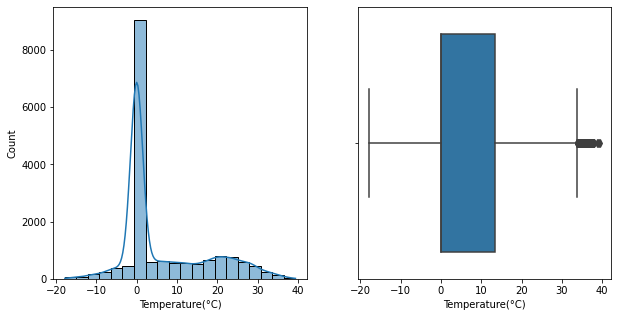

In [ ]:
plt.figure(figsize=(10,5))
ax=plt.subplot(1,2,1)
sns.histplot(data_set['Temperature(°C)'],bins=20,kde=True,ax=ax)
ax=plt.subplot(1,2,2)
sns.boxplot(data_set['Temperature(°C)'],ax=ax)
plt.show()

In [ ]:
iqr=data_set['Temperature(°C)'].quantile(0.75)-data_set['Temperature(°C)'].quantile(0.25)
upper_limit=data_set['Temperature(°C)'].quantile(0.75)+(iqr*1.5)
lower_limit=data_set['Temperature(°C)'].quantile(0.25)-(iqr*1.5)
print(lower_limit,upper_limit)

-20.25 33.75


In [ ]:

data_set[data_set['Temperature(°C)'] > 33.75]

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Day,Month,Year,Autumn,Spring,Summer,Winter
5537,1536.0,17.0,34.0,44.0,2.3,0.0,20.0,1.0,0.0,0.0,0.0,1.0,19.0,7.0,2018.0,0.0,0.0,0.0,0.0
5559,794.0,15.0,34.1,45.0,2.4,0.0,20.4,1.0,0.0,0.0,0.0,1.0,20.0,7.0,2018.0,0.0,0.0,0.0,0.0
5560,928.0,16.0,34.3,45.0,2.3,0.0,20.6,1.0,0.0,0.0,0.0,1.0,20.0,7.0,2018.0,0.0,0.0,0.0,0.0
5561,1468.0,17.0,34.3,44.0,2.1,0.0,20.2,1.0,0.0,0.0,0.0,1.0,20.0,7.0,2018.0,0.0,0.0,0.0,0.0
5562,2419.0,18.0,33.9,42.0,2.0,0.0,19.1,1.0,0.0,0.0,0.0,1.0,20.0,7.0,2018.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6351,842.0,15.0,36.8,36.0,1.0,1.0,19.2,1.0,0.0,0.0,0.0,1.0,22.0,8.0,2018.0,0.0,0.0,0.0,0.0
6352,993.0,16.0,37.4,35.0,1.3,1.0,19.3,1.0,0.0,0.0,0.0,1.0,22.0,8.0,2018.0,0.0,0.0,0.0,0.0
6353,1495.0,17.0,36.4,39.0,1.2,1.0,20.2,1.0,0.0,0.0,0.0,1.0,22.0,8.0,2018.0,0.0,0.0,0.0,0.0
6354,2528.0,18.0,35.4,40.0,1.0,1.0,19.7,1.0,0.0,0.0,0.0,1.0,22.0,8.0,2018.0,0.0,0.0,0.0,0.0


In [ ]:
data_set['Temperature(°C)']=np.where(data_set['Temperature(°C)']>upper_limit, upper_limit, np.where(data_set['Temperature(°C)']<lower_limit, 
                                                                                                    lower_limit, data_set['Temperature(°C)']))

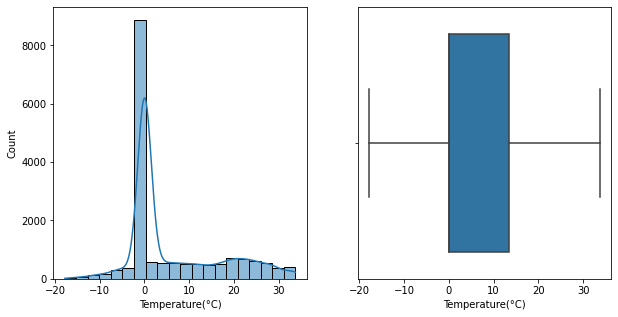

In [ ]:
plt.figure(figsize=(10,5))
ax=plt.subplot(1,2,1)
sns.histplot(data_set['Temperature(°C)'],bins=20,kde=True,ax=ax)
ax=plt.subplot(1,2,2)
sns.boxplot(data_set['Temperature(°C)'],ax=ax)
plt.show()

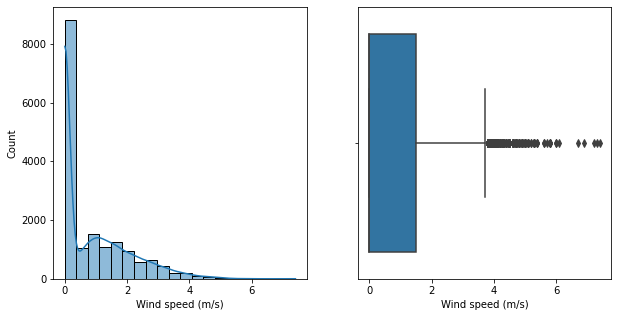

In [ ]:
plt.figure(figsize=(10,5))
ax=plt.subplot(1,2,1)
sns.histplot(data_set['Wind speed (m/s)'],bins=20,kde=True,ax=ax)
ax=plt.subplot(1,2,2)
sns.boxplot(data_set['Wind speed (m/s)'],ax=ax)
plt.show()


In [ ]:
iqr=data_set['Wind speed (m/s)'].quantile(0.75)-data_set['Wind speed (m/s)'].quantile(0.25)
upper_limit=data_set['Wind speed (m/s)'].quantile(0.75)+(iqr*1.5)
lower_limit=data_set['Wind speed (m/s)'].quantile(0.25)-(iqr*1.5)
print(lower_limit,upper_limit)

-2.25 3.75


In [ ]:
data_set[data_set['Wind speed (m/s)'] > 3.75]

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Day,Month,Year,Autumn,Spring,Summer,Winter
16,484.0,16.0,1.2,54.0,4.2,0.0,-7.0,1.0,0.0,0.0,0.0,1.0,12.0,1.0,2017.0,0.0,0.0,0.0,0.0
81,509.0,9.0,-1.5,47.0,4.2,0.0,-11.3,1.0,0.0,0.0,0.0,1.0,12.0,4.0,2017.0,0.0,0.0,0.0,0.0
82,311.0,10.0,-1.1,40.0,4.5,1.0,-13.0,1.0,0.0,0.0,0.0,1.0,12.0,4.0,2017.0,0.0,0.0,0.0,0.0
83,379.0,11.0,-0.5,41.0,4.1,0.0,-12.1,1.0,0.0,0.0,0.0,1.0,12.0,4.0,2017.0,0.0,0.0,0.0,0.0
84,393.0,12.0,-0.3,38.0,4.8,0.0,-12.9,1.0,0.0,0.0,0.0,1.0,12.0,4.0,2017.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7985,1274.0,17.0,10.0,43.0,4.9,1.0,-2.0,1.0,0.0,0.0,0.0,1.0,29.0,10.0,2018.0,0.0,0.0,0.0,0.0
8229,21.0,21.0,14.0,96.0,4.1,0.0,13.3,0.0,1.0,0.0,0.0,1.0,11.0,8.0,2018.0,0.0,0.0,0.0,0.0
8415,995.0,15.0,13.2,61.0,3.9,0.0,5.8,1.0,0.0,0.0,0.0,1.0,16.0,11.0,2018.0,0.0,0.0,0.0,0.0
8420,995.0,20.0,7.6,76.0,3.9,0.0,3.6,0.0,0.0,0.0,0.0,1.0,16.0,11.0,2018.0,0.0,0.0,0.0,0.0


In [ ]:
data_set['Wind speed (m/s)']=np.where(data_set['Wind speed (m/s)']>upper_limit, upper_limit, np.where(data_set['Wind speed (m/s)']<lower_limit, 
                                                                                                    lower_limit, data_set['Wind speed (m/s)']))

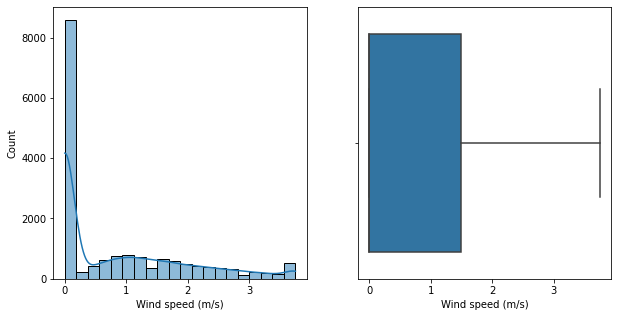

In [ ]:
plt.figure(figsize=(10,5))
ax=plt.subplot(1,2,1)
sns.histplot(data_set['Wind speed (m/s)'],bins=20,kde=True,ax=ax)
ax=plt.subplot(1,2,2)
sns.boxplot(data_set['Wind speed (m/s)'],ax=ax)
plt.show()

In [ ]:

data_set.drop(['Dew point temperature(°C)'],inplace=True,axis=1)

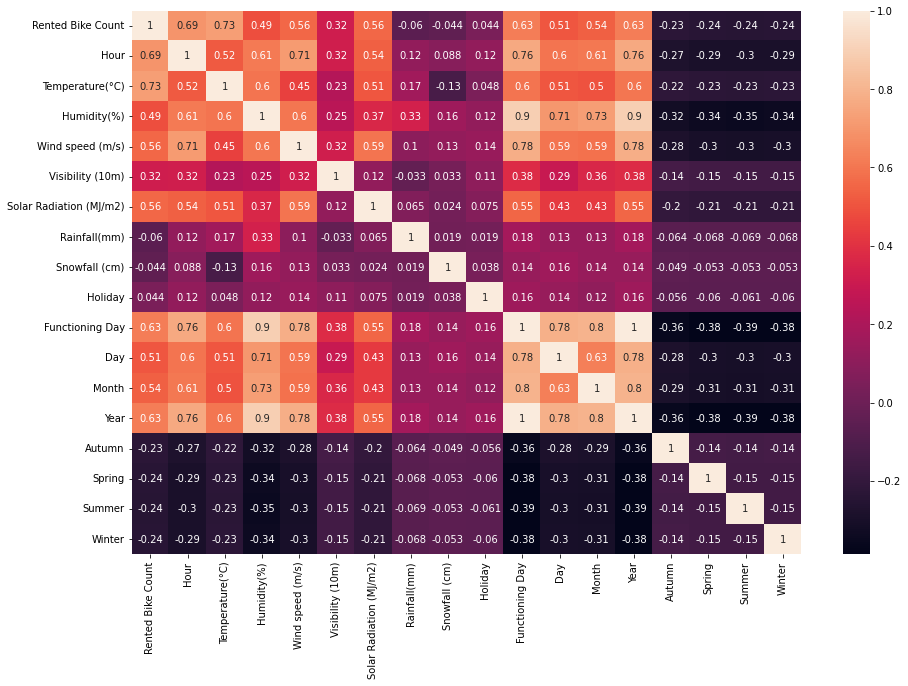

In [ ]:
# Finding correlation 
corr_matrix=data_set.corr()
plt.figure(figsize=(15,10))

sns.heatmap(corr_matrix,annot=True)

### Extracting Independent and dependent Variable 

In [ ]:
#Extracting Independent and dependent Variable 
x=data_set.iloc[:,1:].values
y=data_set.iloc[:,0].values
print(x)
print(y)

[[ 0.  -5.2 37.  ...  0.   0.   0. ]
 [ 1.  -5.5 38.  ...  0.   0.   0. ]
 [ 2.  -6.  39.  ...  0.   0.   0. ]
 ...
 [ 0.   0.   0.  ...  0.   0.   0. ]
 [ 0.   0.   0.  ...  0.   0.   0. ]
 [ 0.   0.   0.  ...  0.   0.   0. ]]
[254. 204. 173. ...   0.   0.   0.]


Here we are extarcting the dependent variable and independent variable for our model.

### **Splitting the dataset into training and test set.**

In [ ]:
# Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

## **## Linear Regression** 

Linear Regression is used as a base model here despite knowing that Linear Regression wouldn’t work here. We fit the model to use R^2 error of this model as a reference to check how good the other models are performing.

In [ ]:
from sklearn.linear_model import LinearRegression
reg1=LinearRegression()
reg1.fit(x_train,y_train)
y_pred = reg1.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


[[9.43e+02 7.42e+02]
 [3.13e-10 0.00e+00]
 [3.13e-10 0.00e+00]
 ...
 [1.02e+03 9.59e+02]
 [1.31e+03 6.99e+02]
 [1.09e+03 7.24e+02]]


* Here we are using Linear regression model for predicting the values we are given x_train and Y_tarin to fitting the model and we predicted the value y

### **## Finding the R^2 value for linear regression**

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.718262669633676

* here we observe the value of r2 is 71% so the linear model is sum what give better predict values.

## Ridge regression
Ridge Regression is used as a base model here despite knowing that ridge Regression wouldn’t work here. We fit the model to use R^2 error of this model as a reference to check how good the other models are performing.

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
from sklearn.linear_model import RidgeCV
model= RidgeCV(alphas=(.01,0.05,0.1,.4,1,2,3),scoring='r2')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[9.42e+02 7.42e+02]
 [6.36e-03 0.00e+00]
 [6.36e-03 0.00e+00]
 ...
 [9.98e+02 9.59e+02]
 [1.31e+03 6.99e+02]
 [1.06e+03 7.24e+02]]


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7163165136439147

## ***Lasso regression***

lasso Regression is used as a base model here despite knowing that lasso Regression wouldn’t work here. We fit the model to use R^2 error of this model as a reference to check how good the other models are performing.

In [ ]:
from sklearn.linear_model import LassoCV
model= LassoCV(eps=0.000000001,n_alphas=300,cv=5)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 9.41e+02  7.42e+02]
 [-3.97e-03  0.00e+00]
 [-3.97e-03  0.00e+00]
 ...
 [ 9.96e+02  9.59e+02]
 [ 1.31e+03  6.99e+02]
 [ 1.06e+03  7.24e+02]]


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7162807121475454

Here we observe that the accuracy that is the r^2 value is approximately equal to the linear regression

## ***Polynomial regression***

polynomial Regression is used as a base model here despite knowing that polynomial Regression would work  better than here. We fit the model to use R^2 error of this model as a reference to check how good the other models are performing.

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2)
x_poly=poly_reg.fit_transform(x_train)
reg1.fit(x_poly,y_train)
y_pred = reg1.predict(poly_reg.transform(x_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[9.31e+02 7.42e+02]
 [1.86e-01 0.00e+00]
 [1.86e-01 0.00e+00]
 ...
 [9.58e+02 9.59e+02]
 [1.00e+03 6.99e+02]
 [1.28e+03 7.24e+02]]


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7910558725915293

* Here we obesrve that the the r^2 value is some what better then the linear ,ridge and lasso regression.

## ***Decission tree regression***

decission tree  Regression is used as a base model here despite knowing that decission Regression would work better here. We fit the model to use R^2 error of this model as a reference to check how good the other models are performing.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
reg2=DecisionTreeRegressor(random_state=0)
reg2.fit(x_train,y_train)
y_pred = reg2.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1010.  742.]
 [   0.    0.]
 [   0.    0.]
 ...
 [ 912.  959.]
 [ 615.  699.]
 [ 916.  724.]]


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8592025974266992

* here we got accuracy that is r^2 value 85%. so it's give better results as compare to the previous models.

## Random forest regression

random forest Regression is used as a base model here despite knowing that random forest  would work well here. We fit the model to use R^2 error of this model as a reference to check how good the other models are performing.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg3=RandomForestRegressor(n_estimators=10,random_state=0)
reg3.fit(x_train,y_train)
y_pred = reg3.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 949.   742. ]
 [   0.     0. ]
 [   0.     0. ]
 ...
 [ 946.1  959. ]
 [ 664.2  699. ]
 [1058.3  724. ]]


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9237055936103883

* here we observe that the random forest regression given better r^2 value compare to the other model.

# ***Conclusion***

*Here we did seoul bike sharing demand prediction. we 6 regression moels that are linear regression,ridge regression,lasso regression, polynomial regression, decission tree regression, random forest regression. out of all types of regression we are gettimg better accuracy that is r^2 value we got in random forest model. so we conclude that the random forest regression model is well suited for our prediction of seoul bike demand.